# Figure 4

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
from PIL import Image, ImageDraw, ImageFont
from matplotlib.lines import Line2D

sys.path.append('./')
sys.path.append('../..') 
sys.path.append('../Fig3') 
from consensus_variables import * 
from load_data_f3 import *
from plot_f3 import *
from plot_f4 import *

In [14]:
# paths
data_dir = "../../data"


mutrate_file = os.path.join(deepcsa_run_dir, "mutrate/all_mutrates.tsv")

regressions_smokageinter_dir = os.path.join(data_dir, "regressions/",
                                    "20250522_FINALPAPER45DONORS_mutrate_ForzeInterc_SelectedGenesPerMetric_tert_smokageinteraction")
figures_dir = "figs/"

In [9]:
mutrate_file = "../../../all_mutrates.tsv"
somatic_maf_file = "../../../all_samples.somatic.mutations.tsv"
clinvars_file = "../../../20250516_metadata_bladder.with_depths.tsv" 


## Load general data

In [10]:
# load metadata and create AGE above 55 category
clinvars_df = pd.read_csv(clinvars_file, sep = "\t")
clinvars_df.loc[clinvars_df["AGE"] > 55, "AGE_above55"] = ">55"
clinvars_df.loc[clinvars_df["AGE"] < 55, "AGE_above55"] = "<55"
clinvars_df

,SAMPLE_ID,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,SMOKING_STATUS,HISTORY_OF_SMOKING,CURRENT_SMOKER,SMOKING_PACK_YEAR,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0047_BDO_01,P19_0047,UF-20-25,46,M,29.9,former,yes,no,NaN,...,4604.716364,12537.872222,8061.174839,10219.111423,7411.275842,10154.727518,8533.763889,1217.225989,7219.964358,<55
1,P19_0009_BTR_01,P19_0009,A150,56,F,32.8,current,yes,yes,NaN,...,20081.660000,22902.629630,3906.232083,9616.333567,3643.054758,19295.271583,2809.628472,2877.779661,8327.585211,>55
2,P19_0008_BDO_01,P19_0008,A149,72,M,28.3,former,yes,no,NaN,...,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383,>55
3,P19_0001_BTR_01,P19_0001,A133,24,M,30.1,never,no,no,0.0,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
4,P19_0041_BDO_01,P19_0041,20-47,59,F,52.7,never,no,no,0.0,...,2385.021818,5453.885185,5192.524296,4991.056762,5017.462665,4003.279676,5407.927083,1000.299435,4480.454219,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,P19_0051_BTR_01,P19_0051,NaN,79,M,35.0,former,yes,no,NaN,...,3423.169091,6183.216667,11250.679166,8946.863350,8309.846559,4375.084532,10197.385417,2199.564972,7265.051577,>55
75,P19_0052_BDO_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,6724.989091,9597.907407,10454.000666,10035.801682,8557.754319,6531.122302,9640.461806,5426.531073,9069.061127,<55
76,P19_0052_BTR_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,4098.137273,4993.168519,5390.901930,5905.169587,4274.387116,4220.028777,4882.638889,2633.853107,4992.780493,<55
77,P19_0053_BDO_01,P19_0053,NaN,72,M,19.5,former,yes,no,NaN,...,3214.100000,5951.287037,11580.210783,8484.175193,8225.657394,3842.708633,10380.493056,2003.457627,7172.570262,>55


In [11]:
# load mutation rate and keep SNVs
mutrate_df = pd.read_csv(mutrate_file, sep = "\t")
mutrate_df = mutrate_df.loc[mutrate_df["MUTTYPES"] == "SNV"][["SAMPLE_ID", "GENE", "REGIONS", "MUTTYPES", "MUTRATE_MB"]]
mutrate_df = mutrate_df.merge(clinvars_df, on = "SAMPLE_ID", how = "inner")
mutrate_df["GENE"] = mutrate_df["GENE"].replace({"ALL_GENES": "total"}) # change for the merging with the regressions df
mutrate_df

,SAMPLE_ID,GENE,REGIONS,MUTTYPES,MUTRATE_MB,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0042_BDO_01,total,protein_affecting,SNV,2.247730,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
1,P19_0042_BDO_01,ARID1A,protein_affecting,SNV,1.131693,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
2,P19_0042_BDO_01,BMP2K,protein_affecting,SNV,0.000000,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
3,P19_0042_BDO_01,CDKN1A,protein_affecting,SNV,2.989433,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
4,P19_0042_BDO_01,CREBBP,protein_affecting,SNV,1.431757,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,P19_0001_BTR_01,STAG2,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13584,P19_0001_BTR_01,TERT,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13585,P19_0001_BTR_01,TERTpromoter,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13586,P19_0001_BTR_01,TP53,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55


In [12]:
# load somatic mutations
somatic_maf_df = pd.read_table(somatic_maf_file)
somatic_maf_df

/tmp/ipykernel_4582/3739797178.py:2: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  somatic_maf_df = pd.read_table(somatic_maf_file)


,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,...,FILTER.not_searched_COMPLEX,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3
0,chr1,26729450,T,C,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0024_BTR_01;TYPE=SNV;DP=930;VD=1;AF...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:930:1:929,1:0.0011:929,0:1,0:930:929,1:3:1...",930,1,...,False,False,False,False,False,False,False,False,False,False
1,chr1,26729474,TAG,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0014_BDO_01;TYPE=Deletion;DP=1470;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1470:1:1469,1:0.0007:1469,0:1,0:1470:1469,...",1470,1,...,False,False,False,False,False,False,False,False,False,False
2,chr1,26729479,TTC,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=Deletion;DP=1984;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1984:1:1983,1:0.0005:1983,0:1,0:1961:1960,...",1961,1,...,False,False,False,False,False,False,False,False,False,False
3,chr1,26729563,G,C,not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=SNV;DP=3490;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:3490:1:3489,1:0.0003:2657,832:1,0:3490:348...",3490,1,...,False,False,False,False,False,False,False,False,False,False
4,chr1,26729566,TA,T,not_in_exons;p10;pSTD,SAMPLE=P19_0040_BTR_01;TYPE=Deletion;DP=2168;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2168:1:2167,1:0.0005:1845,322:0,1:2114:211...",2114,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,chrX,124100705,AAT,A,not_in_exons;p10;pSTD,SAMPLE=P19_0025_BDO_01;TYPE=Deletion;DP=2650;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2650:1:2649,1:0.0004:405,2244:0,1:2720:271...",2720,1,...,False,False,False,False,False,False,False,False,False,False
64274,chrX,124100722,C,T,not_in_exons;pSTD,SAMPLE=P19_0003_BDO_01;TYPE=SNV;DP=2046;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2046:1:2045,1:0.0005:135,1910:0,1:2049:204...",2049,1,...,False,False,False,False,False,False,False,False,False,False
64275,chrX,124100743,G,C,not_in_exons;pSTD,SAMPLE=P19_0052_BTR_01;TYPE=SNV;DP=1441;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1441:1:1440,1:0.0007:53,1387:0,1:1441:1440...",1441,1,...,False,False,False,False,False,False,False,False,False,False
64276,chrX,124100757,T,G,not_in_exons;pSTD,SAMPLE=P19_0038_BDO_01;TYPE=SNV;DP=1168;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1168:1:1167,1:0.0009:8,1159:0,1:1168:1167,...",1168,1,...,False,False,False,False,False,False,False,False,False,False


## Fig4A

In [13]:
# filter mutations in TERT promoter
mutations_in_tert_promoter = somatic_maf_df[(somatic_maf_df['CHROM'] == 'chr5') &
                                            (somatic_maf_df['POS'] >= 1294942) &
                                            (somatic_maf_df['POS'] <= 1295289)
                                ].copy()

mutations_in_tert_promoter

,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,...,FILTER.not_searched_COMPLEX,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3
42651,chr5,1294948,CAG,C,pSTD,SAMPLE=P19_0011_BDO_01;TYPE=Deletion;DP=1255;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1255:1:1254,1:0.0008:649,605:1,0:1253:1252...",1253,1,...,False,False,False,False,False,False,False,False,False,False
42652,chr5,1294964,G,T,pSTD,SAMPLE=P19_0034_BDO_01;TYPE=SNV;DP=4769;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:4769:1:4768,1:0.0002:1690,3078:0,1:4769:47...",4769,1,...,False,False,False,False,False,False,False,False,False,False
42653,chr5,1294973,C,T,pSTD,SAMPLE=P19_0007_BTR_01;TYPE=SNV;DP=3882;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:3882:1:3881,1:0.0003:2709,1172:1,0:3882:38...",3882,1,...,False,False,False,False,False,False,False,False,False,False
42654,chr5,1294976,G,A,p10;pSTD,SAMPLE=P19_0035_BDO_01;TYPE=SNV;DP=2392;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2392:1:2391,1:0.0004:1470,921:1,0:2392:239...",2392,1,...,False,False,False,False,False,False,False,False,False,False
42655,chr5,1294990,C,T,pSTD,SAMPLE=P19_0031_BTR_01;TYPE=SNV;DP=5312;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:5312:1:5311,1:0.0002:2859,2452:1,0:5312:53...",5312,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42742,chr5,1295234,A,G,other_sample_SNP,SAMPLE=P19_0041_BDO_01;TYPE=SNV;DP=1373;VD=2;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1373:2:1371,2:0.0015:573,798:1,1:1375:1373...",1375,2,...,False,False,False,False,False,False,False,False,False,False
42743,chr5,1295240,G,T,pSTD,SAMPLE=P19_0026_BTR_01;TYPE=SNV;DP=1372;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1372:1:1371,1:0.0007:699,672:1,0:1375:1374...",1375,1,...,False,False,False,False,False,False,False,False,False,False
42744,chr5,1295243,CCTG,C,pSTD,SAMPLE=P19_0023_BDO_01;TYPE=Deletion;DP=1137;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1137:1:1136,1:0.0009:724,412:1,0:1149:1148...",1149,1,...,False,False,False,False,False,False,False,False,False,False
42745,chr5,1295245,TGG,T,pSTD,SAMPLE=P19_0004_BDO_01;TYPE=Deletion;DP=2539;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2539:1:2538,1:0.0004:1193,1345:1,0:2550:25...",2550,1,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# create age groups
younger_55 = clinvars_df[clinvars_df["AGE"] < 55]["SAMPLE_ID"].values
older_55_non_smoker = clinvars_df[(clinvars_df["AGE"] > 55) &
                                (clinvars_df["HISTORY_OF_SMOKING"] == "no")]["SAMPLE_ID"].values
older_55_smoker = clinvars_df[(clinvars_df["AGE"] > 55) & 
                            (clinvars_df["HISTORY_OF_SMOKING"] == "yes")]["SAMPLE_ID"].values

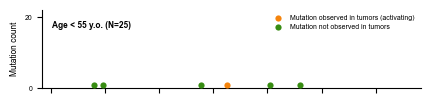

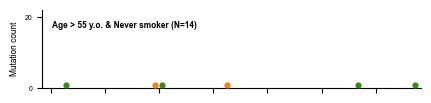

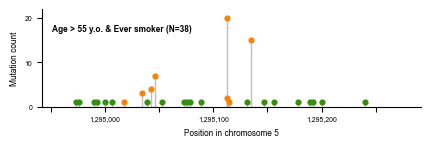

In [36]:
plot_config = {"figsize": (4.893, 1.017),
            "colors": metrics_colors_dictionary,
            "dot_size": 20}
needle_plot(mutations_in_tert_promoter, 
            younger_55, 
            "Age < 55 y.o.",
            plot_config, 
            plots_general_config, 
            os.path.join(figures_dir, "fig4a.above.pdf"), 
            add_xticks = False, add_xlabel = False)
needle_plot(mutations_in_tert_promoter, 
            older_55_non_smoker, 
            "Age > 55 y.o. & Never smoker",
            plot_config, 
            plots_general_config, 
            os.path.join(figures_dir, "fig4a.mid.pdf"),
            add_legend = False, add_xticks = False, add_xlabel = False)
plot_config["figsize"] = (4.893, 1.267)
needle_plot(mutations_in_tert_promoter, 
            older_55_smoker, 
            "Age > 55 y.o. & Ever smoker",
            plot_config, 
            plots_general_config, 
            os.path.join(figures_dir, "fig4a.below.pdf"),
            add_legend = False)

## Fig4B

In [37]:
# filter PA mutation rate
mutrate_PA_df = mutrate_df.loc[mutrate_df["REGIONS"] == "protein_affecting"].rename({"SAMPLE_ID": "sample", "GENE": "gene"}, axis = 1)
mutrate_PA_df

,sample,gene,REGIONS,MUTTYPES,MUTRATE_MB,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0042_BDO_01,total,protein_affecting,SNV,2.247730,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
1,P19_0042_BDO_01,ARID1A,protein_affecting,SNV,1.131693,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
2,P19_0042_BDO_01,BMP2K,protein_affecting,SNV,0.000000,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
3,P19_0042_BDO_01,CDKN1A,protein_affecting,SNV,2.989433,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
4,P19_0042_BDO_01,CREBBP,protein_affecting,SNV,1.431757,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,P19_0001_BTR_01,STAG2,protein_affecting,SNV,1.708129,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13498,P19_0001_BTR_01,TERT,protein_affecting,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13499,P19_0001_BTR_01,TERTpromoter,protein_affecting,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13500,P19_0001_BTR_01,TP53,protein_affecting,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55


In [38]:
# create new custom age+smoking category
mutrate_PA_df["AGE_above55_smoking"] = np.nan
mutrate_PA_df.loc[mutrate_PA_df["AGE_above55"] == "<55", "AGE_above55_smoking"] = "<55 y.o."
mutrate_PA_df.loc[(mutrate_PA_df["AGE_above55"] == ">55") & (mutrate_PA_df["HISTORY_OF_SMOKING"] == "no"), "AGE_above55_smoking"] = ">55 y.o.\nNever\nsmoker"
mutrate_PA_df.loc[(mutrate_PA_df["AGE_above55"] == ">55") & (mutrate_PA_df["HISTORY_OF_SMOKING"] == "yes"), "AGE_above55_smoking"] = ">55 y.o.\nEver\nsmoker"

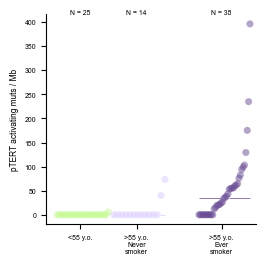

In [45]:
genes_smok = {"TERTpromoter": ""}
clinvar = "AGE_above55_smoking"
metric = "MUTRATE_MB"
n = 0.5
plot_config = {"ylabel": "pTERT activating muts / Mb",
               "xlabel": "",
              "figsize": (2.970+n, 2.590+n),
              "grid_nrows": 17,
              "grid_ncols": 10,
              "titles": genes_smok,
              "dot_size": 12,
              "line_width": 0.5}

plot_sigmoids(os.path.join(figures_dir, "fig4b_sigmoid.pdf"),
              prepare_twin_plot_data(mutrate_PA_df, 
                                    clinvar, 
                                    genes_smok,
                                    clinvar2color[clinvar],
                                    metric).reset_index(drop = True),
              clinvar,
              list(genes_smok.keys()),
              clinvar2color[clinvar],
              plot_config,
              plots_general_config,
              mode='twin')

In [46]:
# load regressions results
regr_mutrate_PA_smokolder55_df_simple = load_lmem_pred(clinvar = "age_decades:history_smoking", 
                                     res_dir = regressions_smokageinter_dir,
                                     metric = "mutrate.proteinaffecting",
                                     obsdata_df = None
                                    )
regr_mutrate_PA_smokolder55_df_simple["gene"] = regr_mutrate_PA_smokolder55_df_simple["gene"].replace("TERTpromoter", "pTERT")
regr_mutrate_PA_smokolder55_df_simple

FileNotFoundError: [Errno 2] No such file or directory: '../../data/regressions/20250522_FINALPAPER45DONORS_mutrate_ForzeInterc_SelectedGenesPerMetric_tert_smokageinteraction'

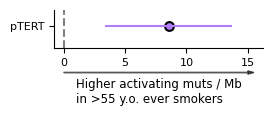

In [42]:
plot_config = {"title": "",
                "ylabels_gene_xcoord": -0.65,
                "arrow_xlim": 15,
                "arrow_yloc": -1.45,
                "arrow_head_width": 0.1,
                "arrow_head_length": .5,
                "effectsize_text": "Higher activating muts / Mb\nin >55 y.o. ever smokers",
                "effectsize_text_loc": 1,
                "effectsize_text_yloc": -2.4,
                "sign_threshold": 0.2,
                "null_effect": 0,
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.12}
plots_general_config_v = plots_general_config
plots_general_config_v["dot_size_coeffplot"] = 40
plots_general_config_v["dot_color_coeffplot"] = "#B27DFA"
regr_res_coeffplot(regrres_df = regr_mutrate_PA_smokolder55_df_simple, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = ["pTERT"], 
                   save_file = os.path.join(figures_dir, "fig4b_regr.png"),
                   regrres2compare_df = None,
                   figsize = (2.7, 0.5), remove_ylabels = False, write_coeff = False)